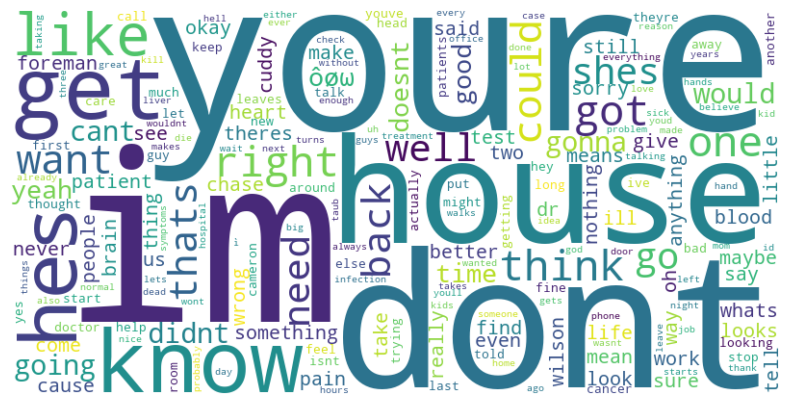

In [9]:
import pandas as pd
from collections import Counter
import string

# Load the CSV file
df = pd.read_csv('consolidated.csv', names=['name', 'line'])

# Drop rows with NaN values in the 'line' column
df = df.dropna(subset=['line'])

# Convert to lowercase and remove punctuation
df['cleaned_line'] = df['line'].str.lower().apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Split the lines into words
df['words'] = df['cleaned_line'].str.split()

# Flatten the list of lists and create a word frequency dictionary
all_words = [word for sublist in df['words'].tolist() for word in sublist]
word_frequency = dict(Counter(all_words))

# List of filler words (in lowercase)
filler_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she',
    'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no',
    'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's',
    't', 'can', 'will', 'just', 'don', 'should', 'now'
]

# Remove filler words from the word frequency dictionary
word_frequency = {word: freq for word, freq in word_frequency.items() if word not in filler_words}

# Generate a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(word_frequency)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud.png')
plt.show()
